In [2]:
import pandas as pd
from dask import delayed
import numpy as np
import math
from time import sleep
import re
import string
import random
from collections import Counter
import sys
np.set_printoptions(threshold=sys.maxsize)
##Imports the song playing capacity.
import webbrowser
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
from sklearn import svm

#Philani's imports
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import time

init_notebook_mode(connected=True)   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

# Hello To My Friends

### My Notes
The program requires the sleep statement this is just to ensure that I can see that certain parts are actually functioning in parallel. <br>
The idea here is that pandas is excellent at reading in csv files so keep pandas to read. <br>
Pandas also does let you do mysql-esque queries so keep it for the same reason. <br>
Pandas has a good data display program - find that Matthew in the other failed itterations <br>
The string lib is for the translate <br>
The Math lib is to find NaNs <br>
The Random lib is just to get samples (training....) <br>
The Collections given the itteration could be one of two things: 1 is it is me actually using the counters. <br>
The other which is 2: I will swap over to two sets of arrays. I dont think that this might be a smart idea but I am likely to try it <br>
There is music just to serve as an alarm for when the data set is done, I thought to add things that are what you do not listen to so that you will always be able to tell when the program is done due to that, however should you want to turn it off feel absolutely free, just remove its library or the line in code where it occurs.<br>
It is in good faith as an artistic expression of how to tell when the program is done. But remove it when you feel the program works with your algorithm. Please try to segment your codes using a header similar to mine.
### How
loadData give it the name of the file you want, the names are tailored to the csv file of fake news <br>

removeStringWords takes in the string(since here we except to give it a title or the text) and then it attempts to remove the naughty words from that string, this is a submethod in the cleanString method. Please if you can actually force it to delete all strings that are bad words, I will thank you cause it seems to not always want to. You can test this and you will see that sometimes the removals make certain strings unreadable - there is some Elton John title in there about sharks and paintings on airplanes ??? I dont know what is going on but that is all it said <br>

CleanString takes in a string for cleaning, it makes them all lowercase, it __attempts__ to remove all punctuation in it using the translate method. It then splits on spaces and calls the cleanString.<br>

Create data sets just gets the data that you want to make your valid, train and test sets from, it uses a panda dataframe so always just pass it that variable from the loadData given your csv file name. Percentage in it is basically the percent reserved for testing and training - split equally i.e give it x and each gets x/2. <br>

CreateIndices I would not worry about, but it just chooses randomly which indices are reserved for testing, validation and training<br>

getCounters is me attempting __*current Matthew*__ to try and get the counters in some fast parallelized way, since the data calculates quite quickly on just this small set, actually delaying(check dask delayed) makes it slower, it is just me trying to test it works. Please do not leave sleep statements anywhere, if I am done and I have not removed that import and I gave it to you, remove it and kill the sleeps. You will have slow data otherwise<br>

Ignore appendArr unless you are really interested, but that is kind of the reason why we will need to find someway to print our parallel visualize somewhere else probably as an image on a doc or something but to tell you I don't know what it is doing would be an understatement. <br>

Add Counters is similar since this works with appendArr. <br>

tempNameCounter just gets the counters for the relevant title and data frame given the labels possible and those that you are interested in. <br>

getRelevantInfo is an abstraction of the functions so that you dont need to worry about the rest only that you need to worry about the outputs for the rest. It basically gets the counters for each label and returns them in order for the labels you gave it i.e if I said labels = [a,b,c] where abc are some arbitrary label then it would return them in that order for the labels of a, b and c. It specifically splits pandas as you know how that would work given reading the above. <br>

DataWarning is me warning you of how long things will take to compute roughly, it depends a bit on your cores but not as much as I would like to given that counters is the real problem. I thought about - maybe I said it somewhere in here - doing two arrays side by side and looking at the strings, finding their index and then incrementing at that index as I read through but I have not done that. I could do it but it is a bit weird and I dont know how much it would impact counters since there would still be a lot of resizing and counters due to the fact *I believe* is a dictionary and that python treats dictionaries as hash tables, it is already quite good and should be similar to the method I would like to do. <br>

Note that however, the get functions return for whatever dataFrame you called given that respective get, the data under that get along with the labels in order (so in our case a getTitle would get you the title column and then all the labels under that title that you wanted given the getRelevantInfo. I have intentionally not let you put labels into it at current given the fact that we only have labels [0,1] <br>

Last addition was an unzip function, give it the data you get from your get function so if you getTitles give it that getTitles function. I recommend that what you do is you pass it something like unzip(getTitles(*dataFrame*)) where that is the dataframe you want and are interested in. But you can use any of the three gets. It will return to you a matrix (so just take from it the specific parts you are interested in e.g temp = unzip(getTitles(trainFrame)), I want the words that are real so I say temp[0] to get the titles that are true. temp[1] to get the count of those that are true __*IN ORDER as they appear in temp[0]*__ then temp[2] gives fake news titles and temp[3] their respective count. That should be all that is necessary.

### Notes on the Data Set
The CSV file contains the news articles. The articles are in the order of - ID, Title, Author, Text, Label. <br>
There are other languages in the data set, there is French and Russian at the very least. These will make calculations take a bit longer since more entries.<br>
We should attempt to only keep the top ~10 000 words or so, otherwise the calculation could be a nightmare.<br>
We could have preprocessed it in visual studio however, I hope that at some point we can just get it to do a web scrape which can boost the mark a bit, what I am referring to is that we can after calculating all our probabilities we just store that (for our best itteration or some random itteration). Then someone would just uses the machine learning algorithm, and it allows a user to enter a link for a news site. Then it attempts to tell if the article is fake news or fake news.<br>


In [3]:
def count_words(text):
    return Counter(text)

In [4]:
def loadData(name):
    return pd.read_csv(name, names = ['ID','Title','Author','Text','Label'])

In [5]:
def removeStringWords(string, badWords):
    size = len(badWords)
    for i in range(size):
        try:
            string.remove(badWords[i])
        except:
            continue
        
    return string

In [6]:
def cleanString(text):
    badWords = ['not','you','at','from','of','us','in','have','yes','no','are','','for','but','that','it','this','he','she','they','that','a','an','who','where','there','his','her','their','i','my','we','our','were','the','if','as','and','in','on','we','to','also','so','is','its']
    try:
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.split(' ')
        text = removeStringWords(text, badWords)
        #rint('success')
        #sleep(0.01)
        return text
    except:
        #print('fail')
        return

In [7]:
def createDataSets(totData, percent):
    dataSize = len(totData)
    testIndices, validIndices = createIndices(dataSize, percent)
    trainIndices = np.empty(0)
    for i in range(dataSize):
        
        if i not in testIndices and i not in validIndices:
            trainIndices = np.append(trainIndices, i)
            
    testFrame = totData.drop(trainIndices)
    testFrame = testFrame.drop(validIndices)
    validFrame = totData.drop(trainIndices)
    validFrame = validFrame.drop(testIndices)
    trainFrame = totData.drop(testIndices)
    trainFrame = trainFrame.drop(validIndices)
    return trainFrame, testFrame, validFrame

In [8]:
def createIndices(dataSize, percent):
    sizeChoice = int(dataSize * 0.2)
    randomChoices = random.sample(range(dataSize-1),sizeChoice)
    half = int(sizeChoice/2)
    firstHalf = randomChoices[0:half]
    secondHalf = randomChoices[half:]
    return firstHalf, secondHalf

Assume that this is given the data, the title of the dataframe and then the labels for that data.

In [9]:
def getCounters(data, title, labelTitle, labelDesired):
        dataTitle = data.loc[data[labelTitle] == labelDesired]
        titleArray = dataTitle[title].to_numpy()
        results = []
        for i in titleArray:
            y = delayed(cleanString)(i)
            try:
                p = float(y[0])
                pass
            except:
                if y is not None:
                    #print(y)
                    appendArr(results,y)
                
        texts = delayed(results)
        return texts.compute()

In [10]:
def appendArr(text, y):
    return text.append(y)

In [11]:
def addCounters(prevCount, currCount):
    return prevCount + currCount

In [12]:
def tempNameCounter(dataFrame, title, labelTitle, labelDesired):
    titleCounterReal = getCounters(trainFrame, title, labelTitle, labelDesired)
    results = []
    resultstwo = []
    j = 0
    for i in titleCounterReal:
        y = delayed(count_words)(i)
        if j % 2:
            results.append(y)
        else:
            resultstwo.append(y) 
    bigCount = delayed(addCounters)(results,resultstwo)
    done = bigCount.compute() 
    #bigCount.visualize()
    sadMe = Counter()
    for i in done:
        sadMe = sadMe + count_words(i)
    return sadMe

In [13]:
def getRelevantInfo(dataFrame, title, labelTitle, labels):
    results = []
    j = 0
    for i in labels:
        #print(tempNameCounter(dataFrame, title, labelTitle, i))
        results.append(tempNameCounter(dataFrame, title, labelTitle, i))
        print("result at index " + str(j) + " corresponds to " + title + " of label " + str(i))
        j +=1
        
    return results

In [14]:
def dataWarning(name):
    if name == 'tenPercent.csv':
        print("Expect a short load time, stay around")
        return
    elif name == 'twentyPercent.csv':
        print('Expect a low load time, stay around')
    elif name == 'fourtyPercent.csv':
        print('Expect a few minites, check your phone or something')
    elif name == 'eightyPercent.csv':
        print('Expect a relatively long load time, do something else in the mean while')
    else:
        print('Expect a long load time, make a cup of tea or something...')

In [15]:
def getTitles(dataFrame):
    print("Running Titles")
    return  getRelevantInfo(dataFrame, 'Title', 'Label', [0,1])
    

In [16]:
def getText(dataFrame):
    print("Running Text")
    return getRelevantInfo(dataFrame, 'Text', 'Label', [0,1])

In [17]:
def getAuthor(dataFrame):
    print("Running Text")
    return getRelevantInfo(dataFrame, 'Author', 'Label', [0,1])

In [18]:
def unzip(data):
    wordsReal, numberReal = [list(c) for c in zip(*list(data[0].items()))]
    wordsFake, numberFake = [list(c) for c in zip(*list(data[1].items()))]
    return [wordsReal,numberReal,wordsFake,numberFake]

In [19]:
def playSongWhenDone():
    # feel free to add songs or remove them as you want, just follow the format of nextNum,songLink
    temp = pd.read_csv('songs.csv', names = ['id', 'url'])
    ID = temp['id'].to_numpy()
    urls = temp['url'].to_numpy()
    i = random.sample(range(len(ID)),1)
    song = urls[i]
    try:
        webbrowser.open(song[0])
    except:
        print("no internet")

In [20]:
#assume that we pass this the results from someething like getText
#This implies that result[0] = realWords, results[2] = fake words
#mainly done in case you get new words and need to make some form laplace smoothing to see if the words are contained in your databased for a given set of data
#e.g have my titles ever seen this word
def createBinaryAllDataString(results):
    #use the longest array
    newArray = np.empty(0)
    usedReal = True
    if len(results[0]) > len(results[1]):
        newArray = results[0]
        usedReal = True
    else:
        newArray = results[2]
        usedReal = False
    if usedReal == True:
        for i in results[2]:
            if i not in newArray:
                newArray = np.append(newArray, i)
    else:
        for i in results[0]:
            if i not in newArray:
                newArray = np.append(newArray, i)
   # testCreateBinaryDataStrings(results[0], results[2], newArray)
    return newArray

In [21]:
#Please only use this to test to see if it generates the binary data correctly it is referenced in createBinaryDataStrings.
#The idea is that should we have all the words captured the result array since it is constituted of words should be equal to the length of the the two sets of words at it's max but obviously
#we expect it to be a bit or a lot smaller than it, so I made a way of testing it to see that everytime it finds a word it counts it as a 1(for being true in the array)
#if the printed counter is not the same as teh array in size then clearly something must be missing.
#hence why this will definitely show that the above works
def testCreateBinaryDataStrings(realArray, fakeArray, resultArray):
    print(len(realArray))
    print(len(fakeArray))
    j = 0 
    for i in realArray:
        if i in resultArray:
            j += 1
    print(j)
    j = 0
    for i in fakeArray:
        if i in resultArray:
            j += 1
    print(j)
    print(len(resultArray))

In [22]:
def vectoriseData(dataPoint, allData):
    size = len(allData)
    binary = np.zeros(size)
    for j in dataPoint:
                         
        if j in allData:
            print(j)          
            binary[np.where(allData==j)] = 1
                         
    return binary
                         

In [23]:
def getEmbeddingModel(allData, num_dimensions_for_model):
    #Use all words in titles and texts to train embedding model
    allTitles = allData[:,1]
    allText = allData[:,3]
    allTitlesAndText = np.concatenate((allText,allTitles))
        
    dataForEmbedding = []
    
    remove = string.punctuation
    
    for currTitleOrText in allTitlesAndText:
        #For each title or text convert to sentences and words in order to
        #get the data in the correct format to train the embedding model

        for j in sent_tokenize(currTitleOrText):
                
            temp = [] 
      
            # tokenize the sentence into words 
            for k in word_tokenize(j):
                
                curr_word = k + ''
                #remove all punctuation from word
                curr_word = curr_word.translate(str.maketrans('', '', remove))
                
                if len(curr_word) > 0:
                    temp.append(curr_word.lower()) 
  
            if len(temp) > 0:
                dataForEmbedding.append(temp) 
            
    
    embeddingModel = gensim.models.Word2Vec(dataForEmbedding, min_count = 1,  size = num_dimensions_for_model, window = 5)
    
    return embeddingModel

In [24]:
def getCleanedData(data):
    #Remove Nan, remove punctuation, and new lines
    feature_names = np.array(['ID','Title','Author','Text'])
    
    #Convert NaNs
    for i in range(3):
        string_replacement = ""
        if i==1:
            string_replacement = "-NO AUTHOR-"
        else:
            string_replacement = "NaN"

        for j in range(len(data)):
            if pd.isnull(data[j][i+1]):
                data[j][2] = string_replacement
        
    #Defining which punctuation to remove
    remove = string.punctuation
    remove = remove.replace(".","“")
    remove = remove.replace("!","”")
    remove = remove.replace("?","’")
    remove = remove + '‘'
    remove = remove + '—'
    remove = remove + '–'

    #Remove NaNs
    data = data[np.all(data != "NaN", axis = 1)]
    
    #Remove punctuation(except '.','?','!') and new lines
    for i in range(3):
        for j in range(len(data)):
            data[j][i+1] = data[j][i+1].replace("\n","").translate(str.maketrans('', '', remove))
    
    return feature_names, data

In [25]:
def convertRowsToDataPoints(data, embedding_model, model_vocab, num_expected_columns):
    #Convert all rows in data to relevant data_points
    data_points_with_labels_list = []
    for row in data:
        convertedRow = convertRowToDataPoint(row, embedding_model, model_vocab)
        if len(convertedRow) == num_expected_columns:
            data_points_with_labels_list.append(convertRowToDataPoint(row, embedding_model, model_vocab))
        
    data_points_with_labels = np.array(data_points_with_labels_list)
    return data_points_with_labels

In [26]:
def convertRowToDataPoint(row, embedding_model, model_vocab):
    #Take in row and convert to data point
    #Stores text points then title points then label
    curr_title = row[1]
    curr_text = row[3]
    data_point = np.array([row[4]])
    data_point = np.append(getAverageEmbedding(curr_title, embedding_model, model_vocab), data_point)
    data_point = np.append(getAverageEmbedding(curr_text, embedding_model, model_vocab), data_point)
    return data_point

In [27]:
def convertRowToDataPointWithoutLabel(row, embedding_model, model_vocab):
    #Take in row and convert to data point
    #Stores text points then title points then label
    curr_title = row[1]
    curr_text = row[3]
    data_point = np.array([])
    data_point = np.append(getAverageEmbedding(curr_title, embedding_model, model_vocab), data_point)
    data_point = np.append(getAverageEmbedding(curr_text, embedding_model, model_vocab), data_point)
    return data_point

In [28]:
def getAverageEmbedding(curr_string, embedding_model, model_vocab):
    #Take in string that has already been cleaned of punctuation and newlines
    total_words = 0.0
    stop_words = ['not','you','at','from','of','us','in','have','yes','no','are','','for','but','that','it','this','he','she','they','that','a','an','who','where','there','his','her','their','i','my','we','our','were','the','if','as','and','in','on','we','to','also','so','is','its']
    remove = string.punctuation
    curr_embedding = np.array([])
    for k in word_tokenize(curr_string):
        curr_word = k + ''
        #remove all punctuation from word
        curr_word = curr_word.translate(str.maketrans('', '', remove))
        #convert to lowercase
        curr_word = curr_word.lower()
        #check if it is a stop word or empty
        if curr_word in stop_words:
            continue
        #check if word is in model_vocab
        if curr_word not in model_vocab:
            continue
        
        if len(curr_embedding) == 0:
            curr_embedding = embedding_model[curr_word]
        else:
            curr_embedding = curr_embedding+embedding_model[curr_word]
        
        total_words = total_words + 1.0
    
    curr_embedding = curr_embedding/total_words
    return curr_embedding

In [29]:
# Load the dataset (start off with a small set, then work your way up). 
# Convert all data to numpy array, because they are faster and easier to work with.
name = 'Actual Data.csv'
data = loadData(name)
data = data.to_numpy()
# print(data[:5])

# Clean the data so that it can be used in training (This refers to removing rows that contain NaN, removing punctuation, and removing \n(newlines))
# Use cleaned data to train our embedding model. The embedding model is what is used to convert the words to meaningful vectors. 
# I give the function the data and the number of dimensions I want my vector to be after converting the word.
feature_names, data = getCleanedData(data)
EmbeddingModel = getEmbeddingModel(data, 100) # test
model_vocab = EmbeddingModel.wv.vocab # test

In [30]:
# Demonstration of converting our data to a usable format(i.e from words to vectors)
trainData = data
trainData2 = data
#validationData = data[100:150]

# Send data to method in order to convert it. Passed through the data, the embedding model we've previously trained,
# the vocabulary of words in our embedded model(to check if we can actually convert a word to a vector or not), 
# and the number of columns we expect in the matrix that will be returned(at the moment I am calculating this
# by using the formula 2*num_dimensions_used_in_embedding + 1).
trainData = convertRowsToDataPoints(trainData, EmbeddingModel, model_vocab, 201)
trainData2 = convertRowsToDataPoints(trainData2, EmbeddingModel, model_vocab, 201)
#validationData = convertRowsToDataPoints(validationData, EmbeddingModel, model_vocab, 201)

#Split y_labels from data to store separately
trainData_y = trainData[:,200]
trainData2_y = trainData2[:,200]

#validationData_y = validationData[:,200]

#Delete y_labels from data
trainData = np.delete(trainData, 200, 1)
trainData2 = np.delete(trainData2, 200, 1)
#validationData = np.delete(validationData, 200, 1)

# Logistic Regression Implementation

Logistic regression will be accomplished using two implementations of gradient descent: loss minimization and the maximum likelihood estimation. 

Reference to the website that helped a lot with the functions:

Kaggle.com. 2020. Logistic Regression From Scratch - Python. [online] Available at: <https://www.kaggle.com/jeppbautista/logistic-regression-from-scratch-python> [Accessed 17 April 2020].

In [31]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

# The following functions will be used in the implementation of loss minimizing with the gradient descent.
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

#The following functions will be used in the implementation of the maximum likelihood estimation with gradient ascent.
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)

def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [36]:
# Implementation of loss minimization with gradient descent:
start_time = time.time()
num_iter = 100000

intercept = np.ones((trainData.shape[0], 1)) 
trainData = np.concatenate((intercept, trainData), axis=1)
theta = np.zeros(trainData.shape[1])

for i in range(num_iter):
    h = sigmoid(trainData, theta)
    gradient = gradient_descent(trainData, h, trainData_y)
    theta = update_weight_loss(theta, 0.5, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.5, num_iter))

# Illustrations of loss minimization with gradient descent:
result = sigmoid(trainData, theta)
f = pd.DataFrame(np.around(result, decimals=6)) 
f['Label'] = trainData_y
f['Classifier'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
f.columns = ['Value','Label','Classifier']

Training time (Log Reg using Gradient descent):565.4274728298187 seconds
Learning rate: 0.5
Iteration: 100000


In [37]:
f

,Value,Label,Classifier
0,0.944316,1.0,1
1,0.411916,0.0,0
2,0.997359,1.0,1
3,0.844300,1.0,1
4,0.765801,1.0,1
...,...,...,...
20119,0.027655,0.0,0
20120,0.000015,0.0,0
20121,0.001544,0.0,0
20122,0.997090,1.0,1


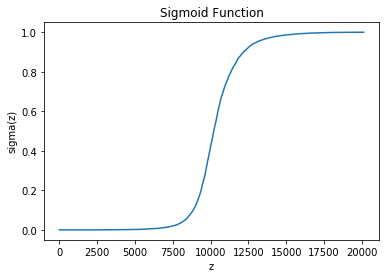

In [38]:
# Sigmoid function of the implementation of loss minimization with gradient descent:
result.sort()
x = np.zeros(trainData.shape[0])
for i in range(trainData.shape[0]):
    x[i] = i
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigma(z)")
plt.plot(x,result)
plt.show()

In [39]:
# Calculating the accuracy of the implementation of loss minimization with gradient descent:
# (Thanks to the help of the scikit-learn library).
actual = f['Label']
predicted = f['Classifier']
cf = confusion_matrix(actual, predicted)

print('Confusion Matrix :')
print(cf) 
print('Accuracy Score :',accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted)) 

Confusion Matrix :
[[9772  614]
 [ 438 9300]]
Accuracy Score : 0.9477241105148082
Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     10386
         1.0       0.94      0.96      0.95      9738

    accuracy                           0.95     20124
   macro avg       0.95      0.95      0.95     20124
weighted avg       0.95      0.95      0.95     20124



In [40]:
# Implementation of the maximum likelihood estimation with gradient ascent: 
start_time = time.time()
num_iter = 100000

intercept2 = np.ones((trainData2.shape[0], 1))
trainData2 = np.concatenate((intercept2, trainData2), axis=1)
theta2 = np.zeros(trainData2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(trainData2, theta2)
    gradient2 = gradient_ascent(trainData2, h2, trainData2_y)
    theta2 = update_weight_mle(theta2, 0.5, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.5, num_iter))

# Illustrations of the maximum likelihood estimation with gradient ascent:
result2 = sigmoid(trainData2, theta2)
f2 = pd.DataFrame(np.around(result2, decimals=6))
f2['Label'] = trainData2_y
f2['Classifier'] = f2[0].apply(lambda x : 0 if x < 0.5 else 1)
f2.columns = ['Value','Label','Classifier']

Training time (Log Reg using MLE):1353.0205280780792seconds
Learning rate: 0.5
Iteration: 100000


In [41]:
f2

,Value,Label,Classifier
0,1.0,1.0,1
1,0.0,0.0,0
2,1.0,1.0,1
3,1.0,1.0,1
4,1.0,1.0,1
...,...,...,...
20119,0.0,0.0,0
20120,0.0,0.0,0
20121,0.0,0.0,0
20122,1.0,1.0,1


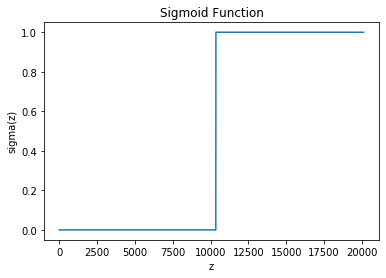

In [42]:
# Sigmoid function of the implementation of the maximum likelihood estimation with gradient descent:
result2.sort()
x = np.zeros(trainData.shape[0])
for i in range(trainData.shape[0]):
    x[i] = i
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigma(z)")
plt.plot(x,result2)
plt.show()

In [43]:
# Calculating the accuracy of the implementation of the maximum likelihood estimation with gradient ascent:
# (Thanks to the help of the scikit-learn library).

actual2 = f2['Label']
predicted2 = f2['Classifier']
cf2 = confusion_matrix(actual2, predicted2)

print('Confusion Matrix :')
print(cf2) 
print('Accuracy Score :',accuracy_score(actual2, predicted2)) 
print('Report : ')
print(classification_report(actual2, predicted2)) 

Confusion Matrix :
[[9808  578]
 [ 540 9198]]
Accuracy Score : 0.9444444444444444
Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     10386
         1.0       0.94      0.94      0.94      9738

    accuracy                           0.94     20124
   macro avg       0.94      0.94      0.94     20124
weighted avg       0.94      0.94      0.94     20124

